In [2]:
import csv
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

TEST_SIZE = 0.4

### Data Prepration

In [76]:
dataset = pd.read_csv("shopping.csv")
mydataset = pd.read_csv("shopping.csv")
dataset.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [77]:
mydataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [78]:
cols=mydataset.columns
print(cols)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [79]:
mydataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [80]:
#The names of month are no standard abbreviation so instead of calender library we used custom function to standard it.
months = {'Jan': 0, 'Feb': 1, 'Mar': 2, 'Apr': 3, 'May': 4, 'June': 5, 'Jul': 6, 'Aug': 7,'Sep': 8, 'Oct': 9, 'Nov': 10, 'Dec': 11}

mydataset['Month'] = mydataset['Month'].map(months).astype(int)

In [81]:
mydataset['VisitorType'] = mydataset['VisitorType'].apply(lambda x: 1 if x=='Returning_Visitor' else 0).astype(int)

In [82]:
mydataset['Weekend'] = mydataset['Weekend'].apply(lambda x: 1 if x == True else 0).astype(int)

In [83]:
mydataset['Revenue'] = mydataset['Revenue'].apply(lambda x: 1 if x == True else 0).astype(int)

In [84]:
mydataset.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [85]:
mydataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [86]:
mydataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,6.651987,2.124006,2.357097,3.147364,4.069586,0.855718,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.351390,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,4.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,10.000000,3.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,11.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000


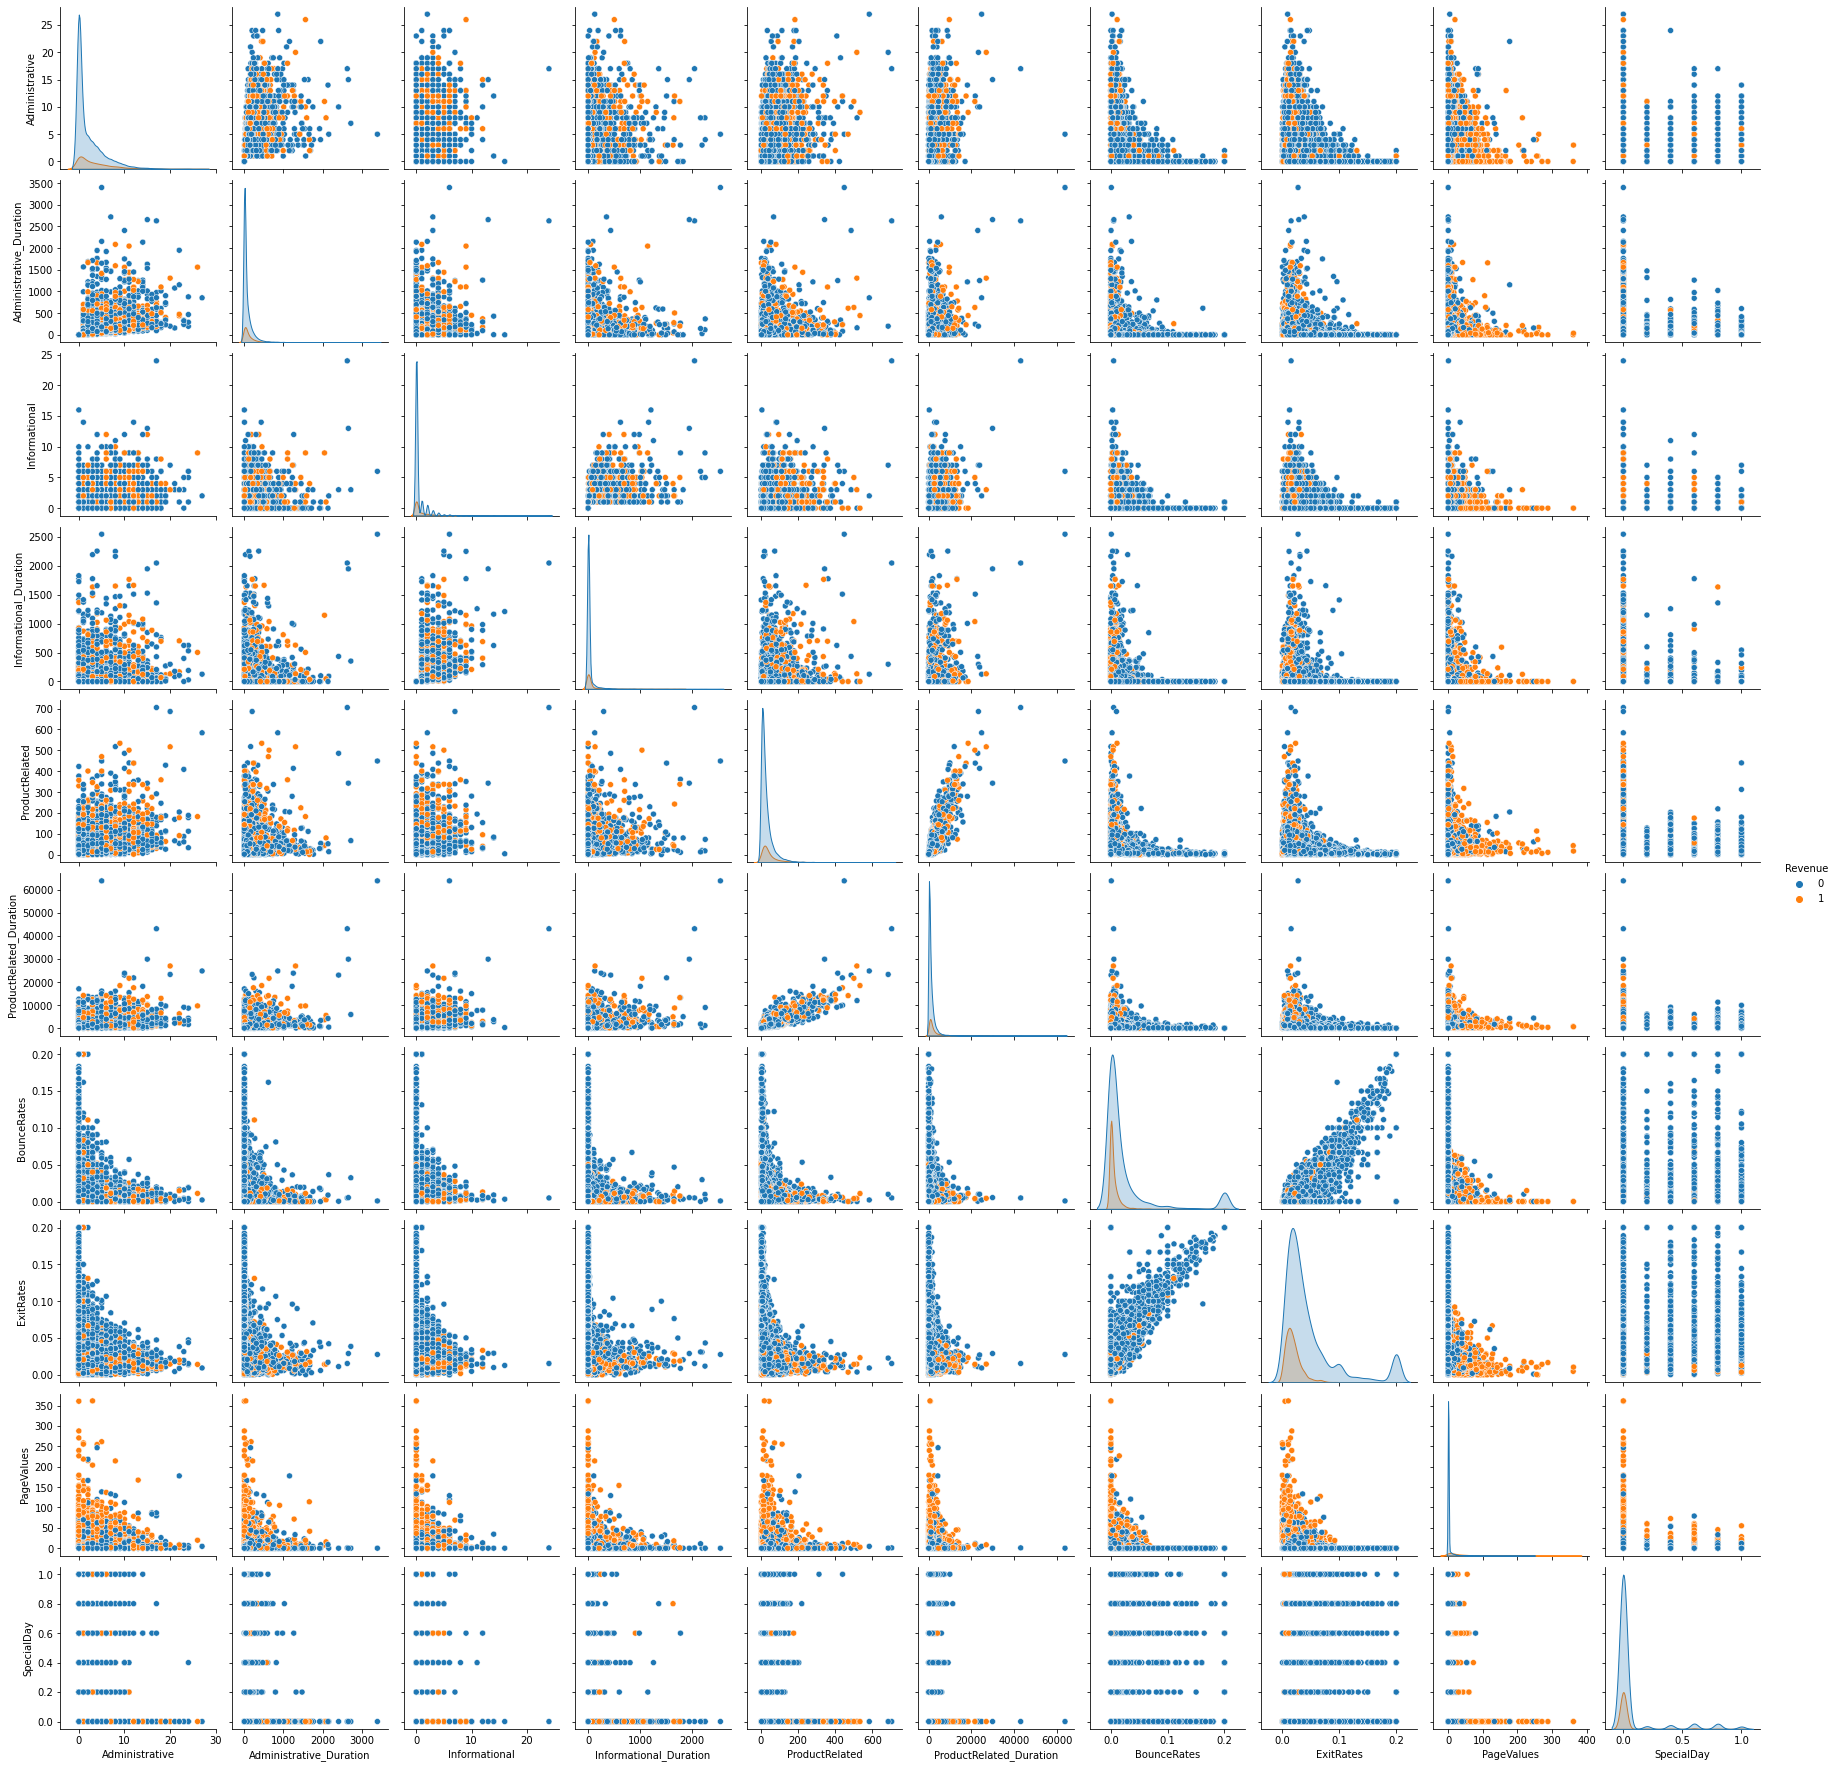

In [17]:
sns.pairplot(mydataset, vars = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],hue = 'Revenue')

<AxesSubplot: >

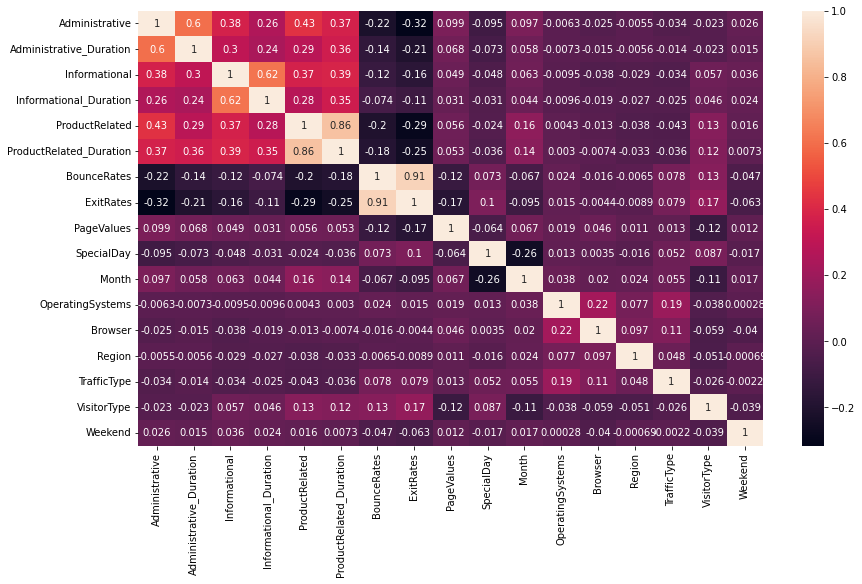

In [18]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.heatmap(mydataset.iloc[:,0:-1].corr('pearson'), ax=ax, annot=True)

As you can see, we can find from diagram above that:
- There are some positive correlation between BouneRates & ExitRates


/home/hezardastan/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


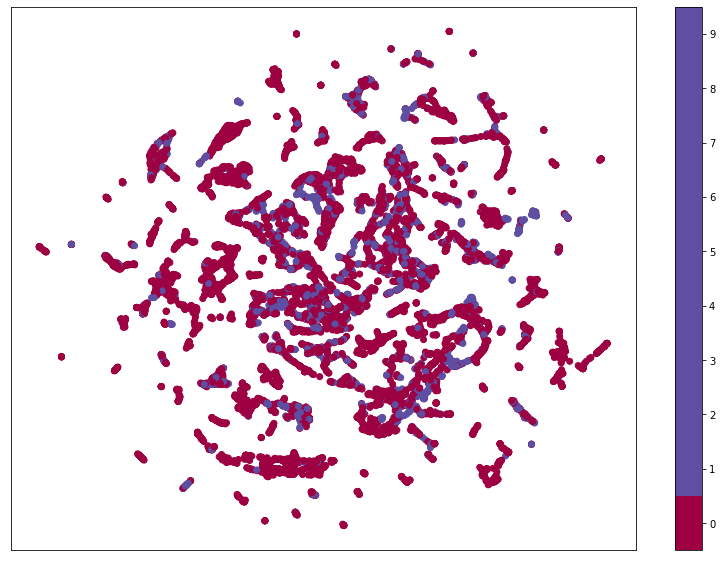

In [22]:
import umap

x_dropped = mydataset
# removing the target column revenue from x
x_dropped = x_dropped.drop(['Revenue'], axis = 1)
y = mydataset['Revenue']

embedding = umap.UMAP(n_neighbors=5).fit_transform(x_dropped)

fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, c=y, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))



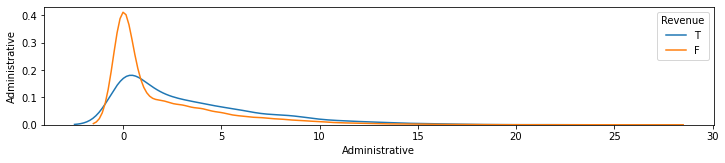

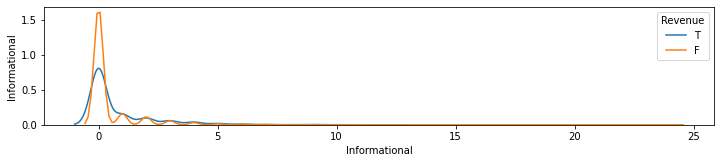

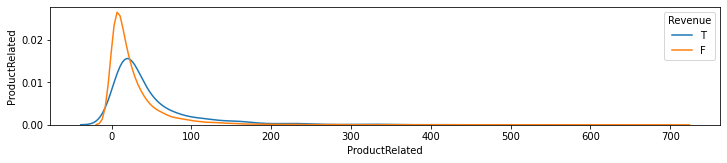

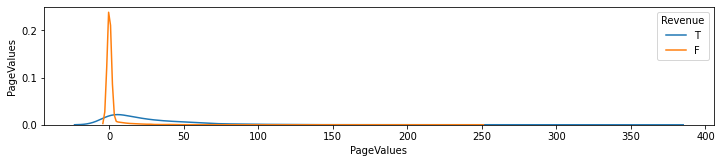

In [75]:
#Visit to pages vs Revenue
plt.figure(figsize=(12,10))

ax1 = plt.subplot(411)
sns.kdeplot(mydataset[mydataset.Revenue == True].Administrative)
sns.kdeplot(mydataset[mydataset.Revenue == False].Administrative)
plt.ylabel('Administrative')
plt.legend(title='Revenue', labels=['T', 'F'])

plt.figure(figsize=(12,10))
ax2 = plt.subplot(412)
sns.kdeplot(mydataset[mydataset.Revenue == True].Informational)
sns.kdeplot(mydataset[mydataset.Revenue == False].Informational)
plt.ylabel('Informational')
plt.legend(title='Revenue', labels=['T', 'F'])
plt.show()

plt.figure(figsize=(12,10))
ax3 = plt.subplot(413)
sns.kdeplot(mydataset[mydataset.Revenue == True].ProductRelated)
sns.kdeplot(mydataset[mydataset.Revenue == False].ProductRelated)
plt.ylabel('ProductRelated')
plt.legend(title='Revenue', labels=['T', 'F'])
plt.show()

plt.figure(figsize=(12,10))
ax3 = plt.subplot(414)
sns.kdeplot(mydataset[mydataset.Revenue == True].PageValues)
sns.kdeplot(mydataset[mydataset.Revenue == False].PageValues)
plt.ylabel('PageValues')
plt.legend(title='Revenue', labels=['T', 'F'])
plt.show()

In [24]:
print(mydataset['Revenue'].value_counts())

0    10422
1     1908
Name: Revenue, dtype: int64


In [87]:
x = mydataset
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)

#LogScale:
x=np.log1p(x)

y = mydataset['Revenue']

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 17)
Shape of y: (12330,)


In [88]:
# splitting the data

from sklearn.model_selection import train_test_split

X_Train, X_Test, y_Train, y_Test = train_test_split(x, y, test_size = TEST_SIZE, random_state = 42,shuffle=True,stratify=y)

# checking the shapes

print("Shape of x_train :", X_Train.shape)
print("Shape of y_train :", y_Train.shape)
print("Shape of x_test :", X_Test.shape)
print("Shape of y_test :", y_Test.shape)

Shape of x_train : (7398, 17)
Shape of y_train : (7398,)
Shape of x_test : (4932, 17)
Shape of y_test : (4932,)


In [22]:
#Also we can use standard scaler but the distribution is skewed so it is better to use logarithmic
from sklearn.preprocessing import StandardScaler

num_cols_names = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 
                              'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues',
                               'TrafficType','SpecialDay']

scaler = StandardScaler()

scaled_numfeats_train = pd.DataFrame(scaler.fit_transform(X_Train[num_cols_names]),columns=num_cols_names, index= X_Train.index)
for col in num_cols_names:
    X_Train[col] = scaled_numfeats_train[col]
    

scaled_numfeats_test = pd.DataFrame(scaler.transform(X_Test[num_cols_names]),columns=num_cols_names, index= X_Test.index)
for col in num_cols_names:
    X_Test[col] = scaled_numfeats_test[col]

In [36]:
X_Train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
7516,0.000000,0.000000,0.0,0.0,3.218876,6.411764,0.000000,0.004158,3.019188,0.0,2.397895,1.609438,0.693147,0.693147,1.098612,0.000000,0.000000
10519,0.693147,2.708050,0.0,0.0,2.708050,6.896758,0.014185,0.028171,4.246337,0.0,2.484907,1.098612,1.791759,2.302585,0.693147,0.693147,0.000000
6588,1.386294,3.589059,0.0,0.0,3.806662,7.337371,0.012685,0.014085,2.901983,0.0,1.945910,0.693147,0.693147,0.693147,1.386294,0.693147,0.000000
490,0.000000,0.000000,0.0,0.0,2.079442,5.671604,0.000000,0.014185,0.000000,0.0,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
7800,0.000000,0.000000,0.0,0.0,3.737670,8.128821,0.031962,0.048975,0.000000,0.0,2.197225,1.098612,1.609438,1.386294,0.693147,0.693147,0.000000


In [62]:
# X_Train.drop(labels=['Browser','BounceRates','OperatingSystems','ProductRelated','VisitorType','Region','Weekend','Month'], 
#                  axis=1, inplace=True)
# X_Test.drop(labels=['Browser','BounceRates','OperatingSystems','ProductRelated','VisitorType','Region','Weekend','Month'], 
#                 axis=1, inplace=True)

In [63]:
print(X_Train.shape, X_Test.shape)

(7398, 9) (4932, 9)


### With Library

In [124]:

classifier_knn = KNeighborsClassifier() 
classifier_knn.fit(X_Train,y_Train)
print(classifier_knn)


y_pred=classifier_knn.predict(X_Test)

# evaluating the model
print("Training Accuracy :", classifier_knn.score(X_Train, y_Train))
print("Testing Accuracy :", classifier_knn.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))


print("CONFUSION MATRIX")
print(confusion_matrix(y_Test,y_pred))
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))

# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_knn, X = X_Train, y = y_Train, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))

KNeighborsClassifier()
Training Accuracy : 0.9188969991889699
Testing Accuracy : 0.8854420113544201
ROC AUC Score : 0.7502103933199767
CONFUSION MATRIX
[[3944  225]
 [ 340  423]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      4169
           1       0.65      0.55      0.60       763

    accuracy                           0.89      4932
   macro avg       0.79      0.75      0.77      4932
weighted avg       0.88      0.89      0.88      4932

CROSS VALIDATION METRICS
Mean Accuracy : 0.8871296126979484
Mean precision score : 0.6663947758570239
Mean recall score : 0.5501525553012966
Mean f1 score : 0.6017825579535279
Mean AUC ROC Score : 0.7494896961809997


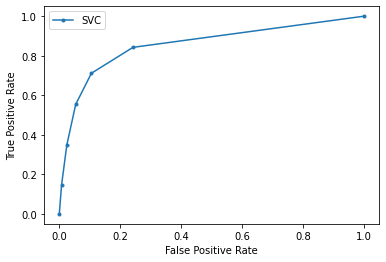

In [133]:
from sklearn.metrics import roc_curve
pred_prob = classifier_knn.predict_proba(X_Test)
fpr1, tpr1, thresh1 = roc_curve(y_Test, pred_prob[:,1])

pyplot.plot(fpr1, tpr1, marker='.', label='SVC')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
base_classifier = KNeighborsClassifier()
params = [
    {
     'n_neighbors':[3,5,10,15],
        'leaf_size':[20,30,40],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree','kd_tree','brute']
    }
]

best_classifier = GridSearchCV(base_classifier, param_grid=params, n_jobs=-1,cv=10)

#Learning
best_classifier.fit(X_Train,y_Train)
print(best_classifier)
print("Best  Parameters:",best_classifier.best_params_)
print("Best Accuracy :",best_classifier.best_score_)
print("Best Estimators:",best_classifier.best_estimator_)

In [25]:
X_Train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,TrafficType
7516,-0.698275,-0.448355,-0.392705,-0.239739,-0.297532,-0.797578,0.717501,-0.310625,-0.513355
10519,-0.398667,-0.370461,-0.392705,-0.239739,-0.098813,-0.296359,3.345857,-0.310625,-0.762309
6588,0.200549,-0.252508,-0.392705,-0.239739,0.187482,-0.591836,0.596958,-0.310625,-0.264400
490,-0.698275,-0.448355,-0.392705,-0.239739,-0.464031,-0.589756,-0.319197,-0.310625,-0.762309
7800,-0.698275,-0.448355,-0.392705,-0.239739,1.156849,0.147724,-0.319197,-0.310625,-0.762309


### From Scratch

In [89]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    distance = np.linalg.norm(x1 - x2)
    return distance

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [90]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


X_train = np.array(X_Train)
y_train = np.array(y_Train)
X_test = np.array(X_Test)
y_test = np.array(y_Test)


clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)


acc = np.sum(predictions == y_test) / len(y_test)
print('Accuracy: %.3f' %acc)

Accuracy: 0.885


In [51]:
predictions2 = clf.predict(X_train)
acc = np.sum(predictions2 == y_train) / len(y_train)
print('Accuracy: %.3f' %acc)

Accuracy: 0.919


In [52]:
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score

fiscore = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print("ROC-AUC Score:", roc_auc)
print("F1 Score:", fiscore)

Precision: 0.653
Recall: 0.554
ROC-AUC Score: 0.7502103933199767
F1 Score: 0.5995747696669029
